In [1]:
import pandas as pd  # data manupulation
import numpy as np #
import matplotlib.pyplot as plt #data plotting
import seaborn #for data visulization
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [2]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


[0]


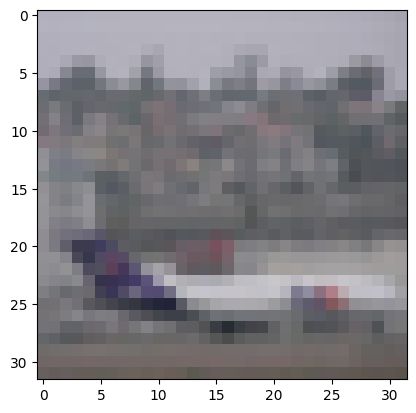

In [3]:
i = 30000
plt.imshow(X_train[i])
print(y_train[i])

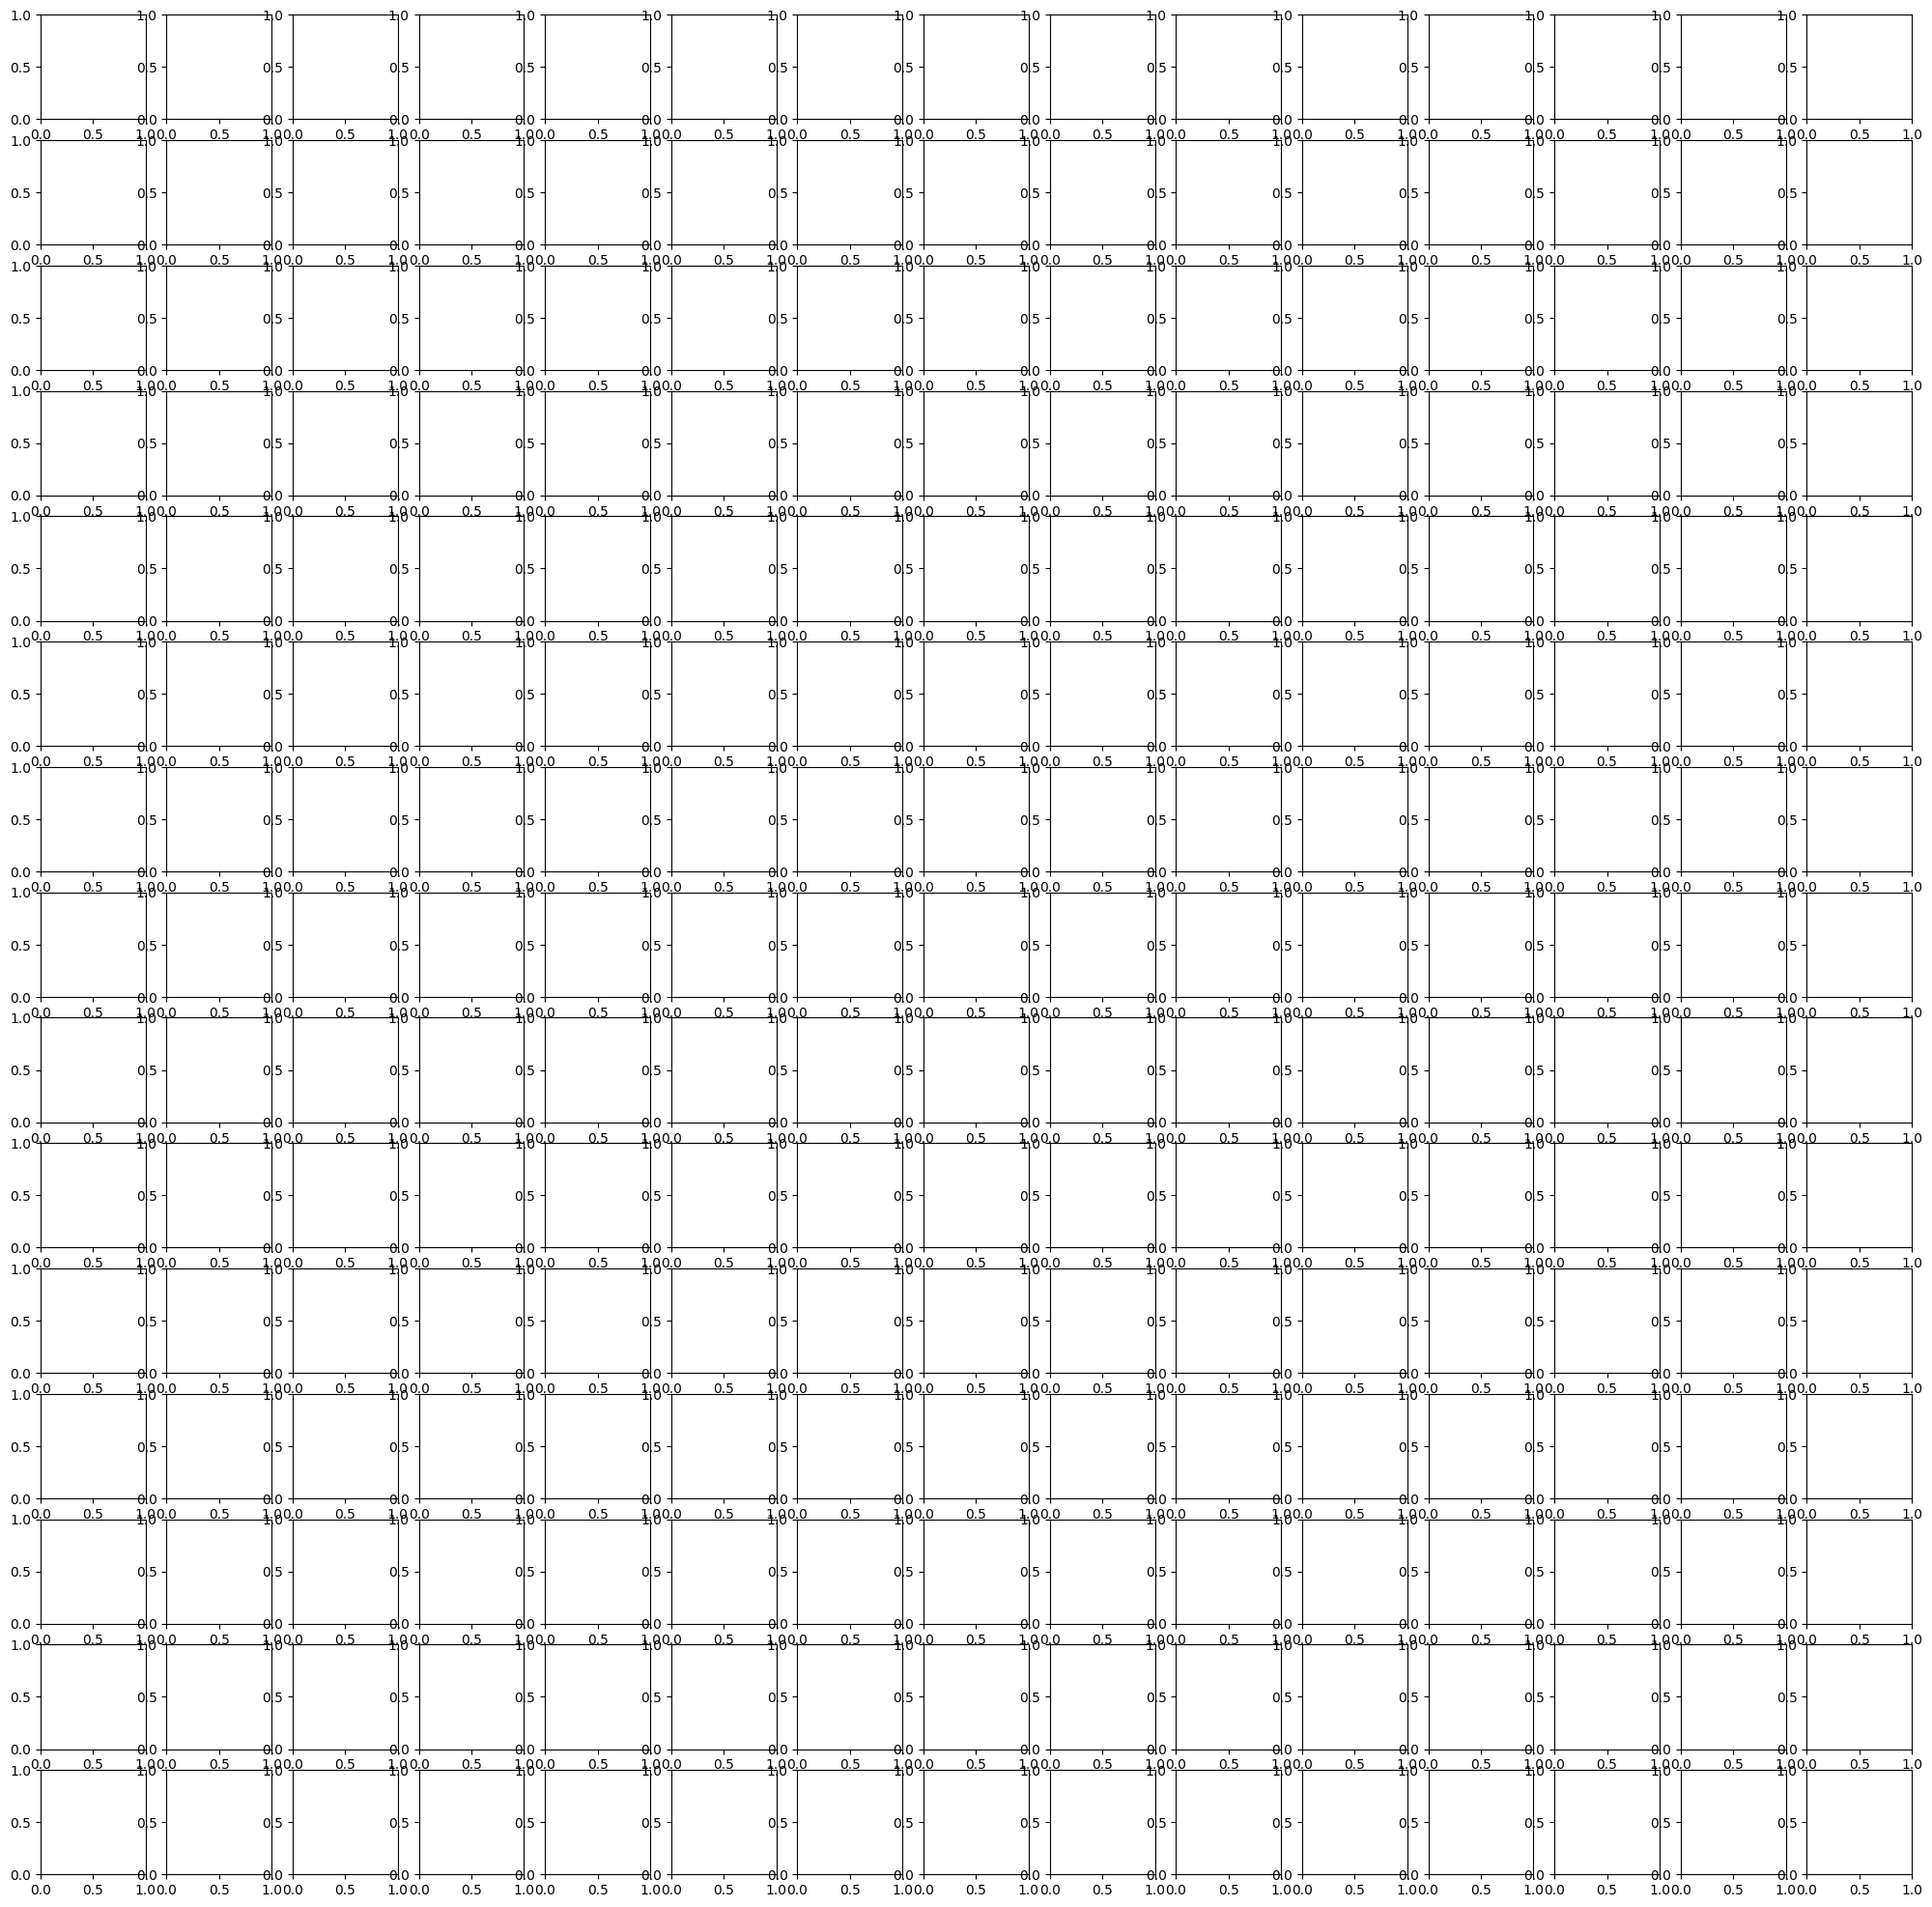

In [4]:
W_grid = 15 #width of grid
L_grid = 15  # length of grid

fig, axes = plt.subplots(L_grid,W_grid, figsize = (25,25))
#fig - It is the enitre figure
#axes - its the each subplot in the figure

axes = axes.ravel()
#ravel - To flatten each subplot

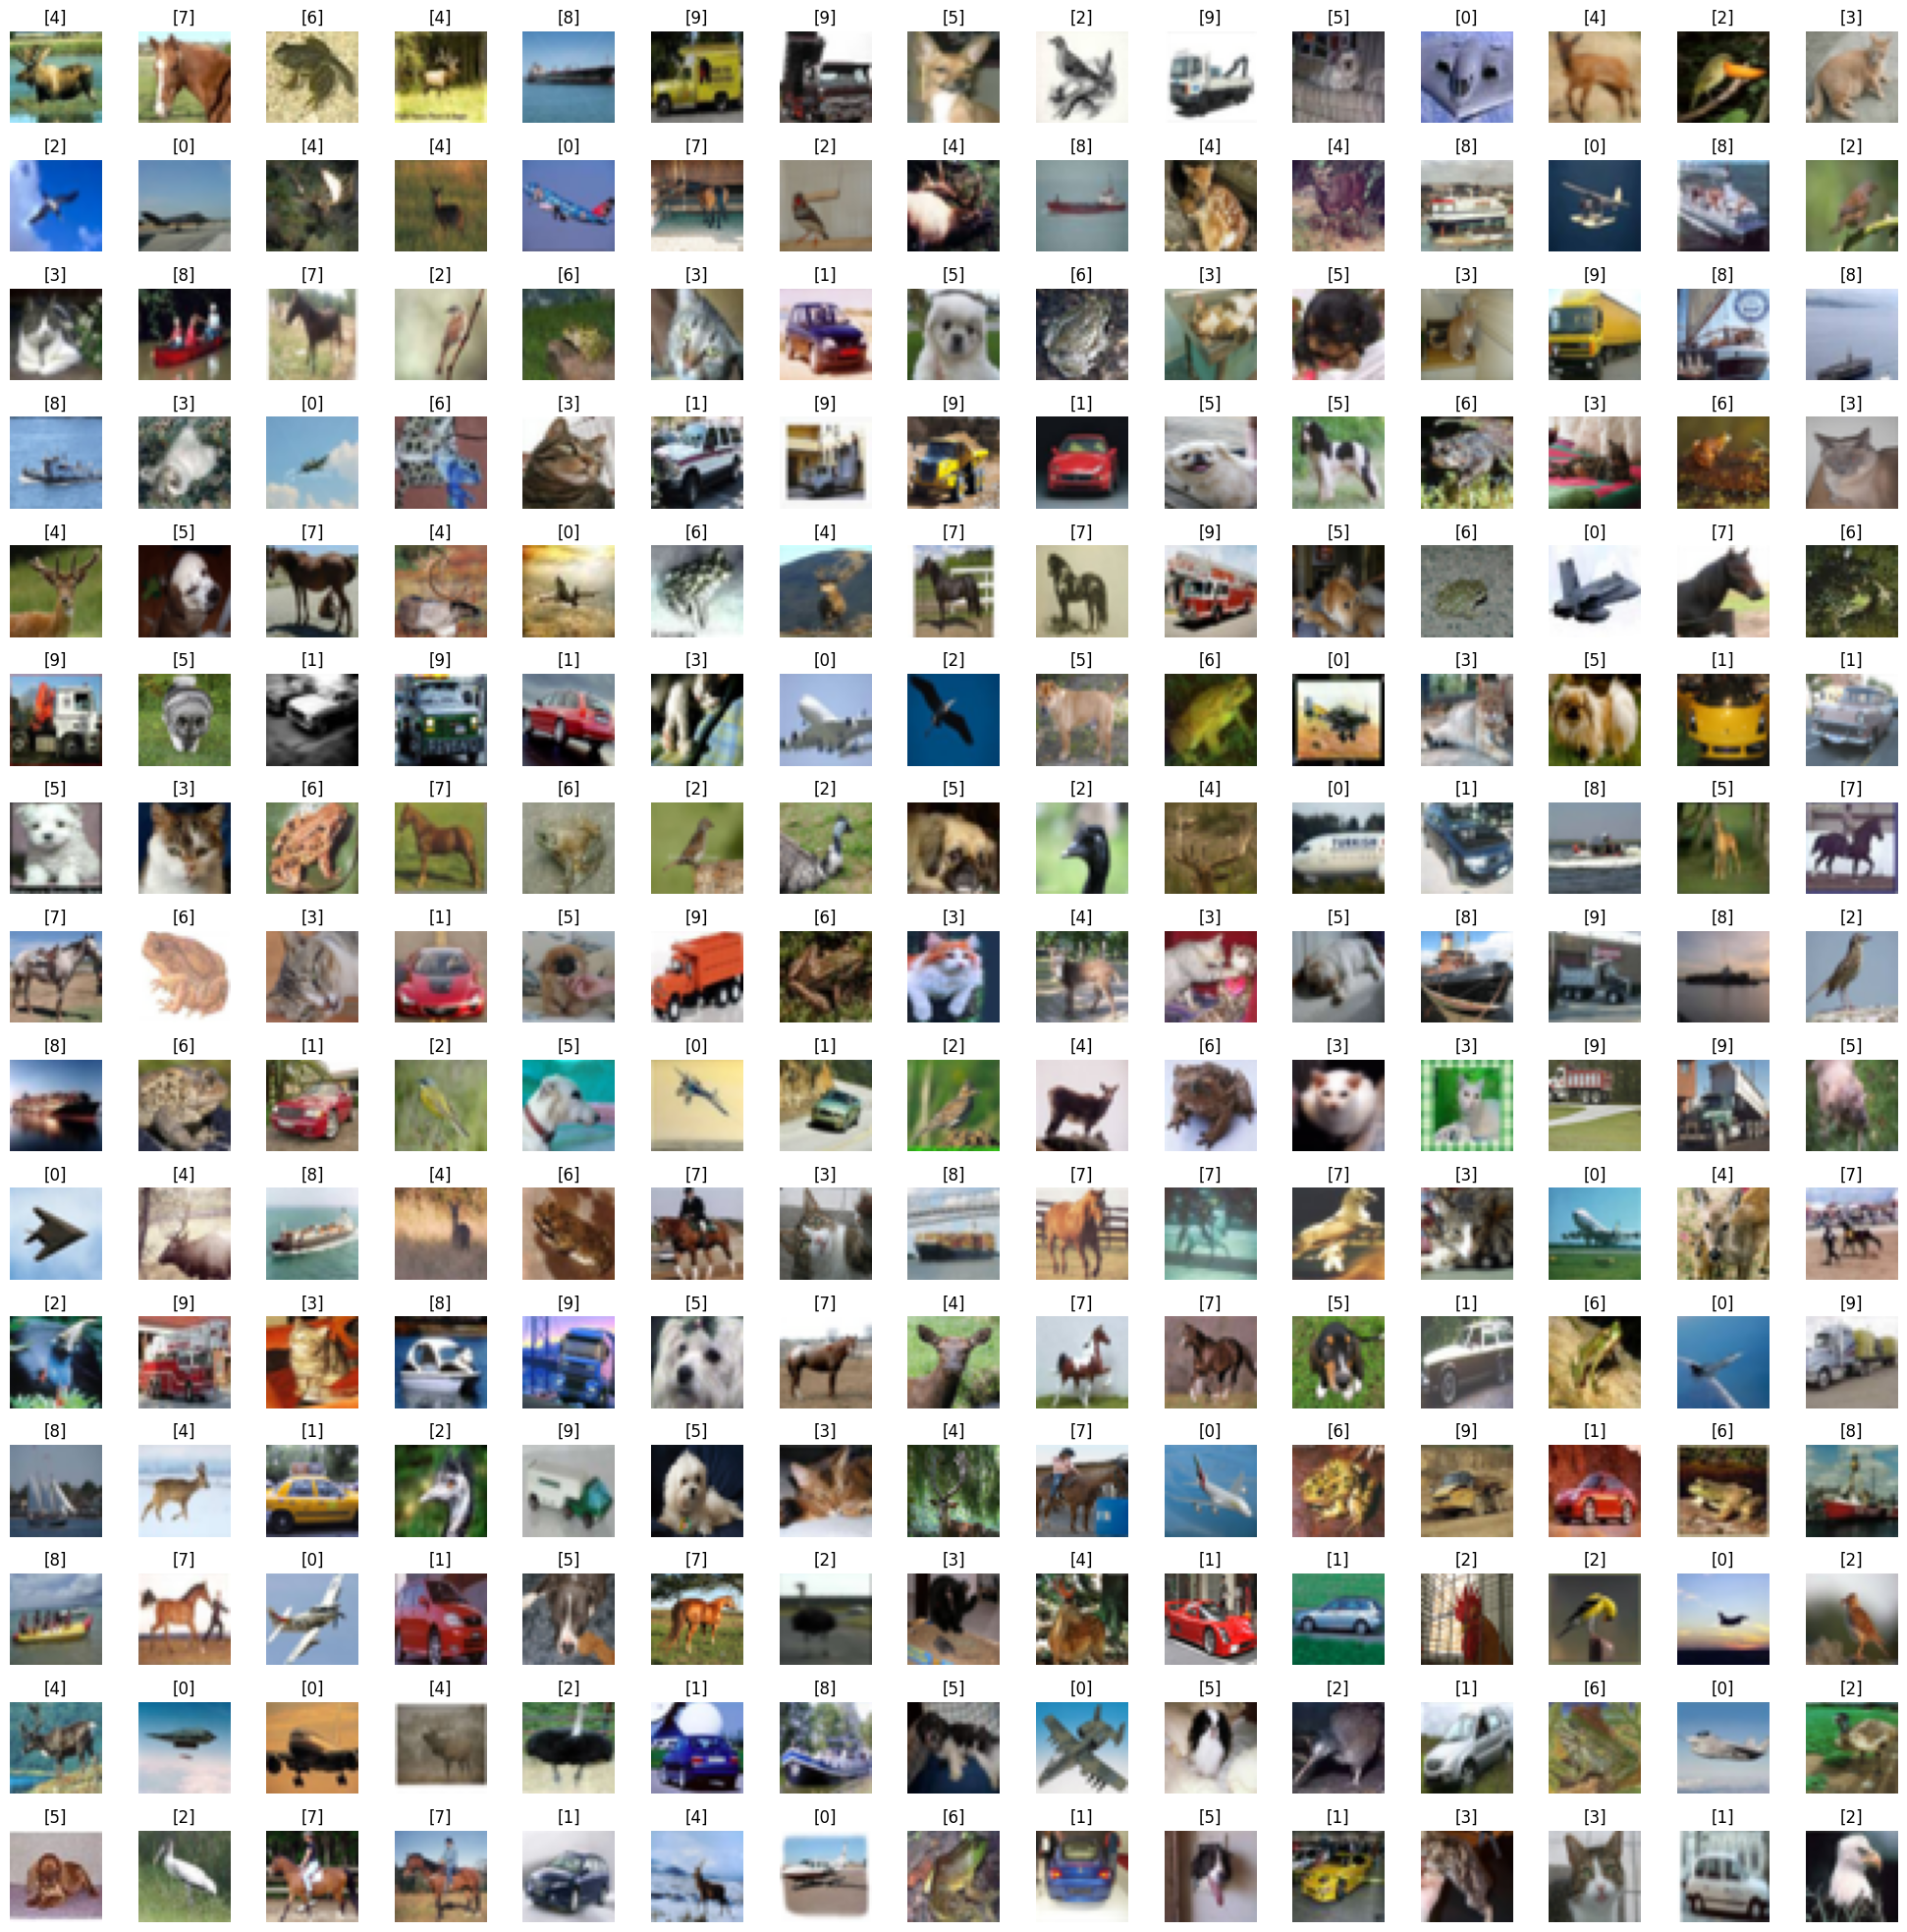

In [5]:
W_grid = 15 #width of grid
L_grid = 15  # length of grid

fig, axes = plt.subplots(L_grid,W_grid, figsize = (25,25))
#fig - It is the enitre figure
#axes - its the each subplot in the figure

axes = axes.ravel()
#ravel - To flatten each subplot

#np.arange is used to create an array with index 0 to 255
n_training = len(X_train)

#np.random.randint is used to randomly slect an integer value from 0 to 50000
for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index]) #Creating label for each image
  axes[i].axis('Off') #Removing the axis dimensions

plt.subplots_adjust(hspace = 0.4) #hspace is adjusting the space between two images

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(len(X_train))

50000


In [7]:
number_categories = 10
import keras
y_train = keras.utils.to_categorical(y_train, number_categories)

In [8]:
y_test = keras.utils.to_categorical(y_test, number_categories)

In [9]:
#Data Normalization which ranges from 0 to 1

X_train = X_train/255
X_test = X_test/255

In [10]:
#Extracting only the dimensions to provide the imput

Input_shape = X_train.shape[1:]
print(Input_shape)

(32, 32, 3)


In [11]:
#To build the model in sequential manner -left to right

from keras.models import Sequential

#Conv2D- for convolution
#MaxPooling2D - for subsampling (To get the maximun value of the pixels)
#AveragePooling2D - (To get the average vales of the pixels)
#Dense - To connent the neural network
#Flatten - To flatten all the feature maps to one simple array of neurons
#Dropout - To perform some regularization (Which is droping some neurons along with their weights to improve the generalization capability of network)
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout

#Adam - To perform optimization (To obtain the weights of the network)
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [12]:
'''The provided code snippet appears to be part of a Convolutional Neural Network (CNN) model architecture definition in a deep learning framework such as Keras or TensorFlow. Let's break down the code:

```python
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
```

Explanation:
- `cnn_model`: This is a variable representing a sequential model in Keras or TensorFlow, to which layers are being added sequentially.
- `.add()`: This method is used to add layers to the model.
- `Conv2D`: This represents a 2-dimensional convolutional layer, commonly used in CNNs for extracting features from input images.
- `filters=32`: This parameter specifies the number of filters (or kernels) that the convolutional layer will learn. Each filter extracts different features from the input.
- `kernel_size=(3,3)`: This parameter specifies the size of the convolutional kernel or filter. In this case, it's a 3x3 kernel, meaning each filter will slide over the input image in a 3x3 window.
- `activation='relu'`: This parameter specifies the activation function applied element-wise to the output of the convolutional layer. `'relu'` stands for Rectified Linear Unit, a commonly used activation function in deep learning due to its ability to introduce non-linearity to the model.
- `input_shape=input_shape`: This parameter specifies the shape of the input data expected by the convolutional layer. `input_shape` is a tuple representing the shape of the input data, typically in the format `(height, width, channels)` for image data.

Overall, this line of code adds a 2D convolutional layer to the CNN model with 32 filters, each with a 3x3 kernel size, using the ReLU activation function, and expects input data with the shape specified by `input_shape`.'''

cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 96, kernel_size =(3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 96, kernel_size =(3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))


In [13]:
# Adding more layers to increase the depth of the neural network
cnn_model.add(Conv2D(filters = 192, kernel_size =(3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 192, kernel_size =(3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.5))

In [14]:
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))

In [15]:
#Output Layer
#Softmax function is used since the output will be 0 or 1
#Units = 10 signify the 10 classes
cnn_model.add(BatchNormalization())
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [20]:
y_test = y_test.argmax(1)

In [17]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 90,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = False)

datagen.fit(X_train)

In [ ]:
cnn_model.compile(loss= 'categorical_crossentropy', optimizer=Adam(learning_rate=1.0e-4), metrics = ['accuracy'])

In [ ]:
from keras.utils import to_categorical

y_test_encoded = to_categorical(y_test)

In [ ]:
# train with image augmentation
history = cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                                  epochs=100, validation_data=(X_test, y_test_encoded))

Epoch 1/100
391/390 [==============================] - 106s 272ms/step - loss: 1.6073 - acc: 0.4661 - val_loss: 1.3294 - val_acc: 0.5226
Epoch 2/100
391/390 [==============================] - 71s 182ms/step - loss: 1.0941 - acc: 0.6148 - val_loss: 0.8888 - val_acc: 0.6878
Epoch 3/100
391/390 [==============================] - 71s 182ms/step - loss: 0.9122 - acc: 0.6787 - val_loss: 0.7557 - val_acc: 0.7307
Epoch 4/100
391/390 [==============================] - 70s 180ms/step - loss: 0.8082 - acc: 0.7150 - val_loss: 0.7181 - val_acc: 0.7479
Epoch 5/100
391/390 [==============================] - 71s 181ms/step - loss: 0.7442 - acc: 0.7393 - val_loss: 0.6809 - val_acc: 0.7643
Epoch 6/100
391/390 [==============================] - 71s 181ms/step - loss: 0.6942 - acc: 0.7544 - val_loss: 0.6384 - val_acc: 0.7817
Epoch 7/100
391/390 [==============================] - 71s 181ms/step - loss: 0.6465 - acc: 0.7752 - val_loss: 0.5781 - val_acc: 0.8008
Epoch 8/100
391/390 [==========================

Epoch 61/100
391/390 [==============================] - 69s 178ms/step - loss: 0.2121 - acc: 0.9261 - val_loss: 0.3299 - val_acc: 0.8972
Epoch 62/100
391/390 [==============================] - 69s 177ms/step - loss: 0.2107 - acc: 0.9250 - val_loss: 0.3235 - val_acc: 0.9022
Epoch 63/100
391/390 [==============================] - 69s 177ms/step - loss: 0.2028 - acc: 0.9281 - val_loss: 0.3272 - val_acc: 0.8979
Epoch 64/100
391/390 [==============================] - 69s 178ms/step - loss: 0.2044 - acc: 0.9288 - val_loss: 0.3256 - val_acc: 0.8989
Epoch 65/100
391/390 [==============================] - 69s 177ms/step - loss: 0.2003 - acc: 0.9295 - val_loss: 0.3353 - val_acc: 0.8943
Epoch 66/100
391/390 [==============================] - 69s 177ms/step - loss: 0.1975 - acc: 0.9299 - val_loss: 0.3303 - val_acc: 0.8991
Epoch 67/100
391/390 [==============================] - 70s 178ms/step - loss: 0.1987 - acc: 0.9305 - val_loss: 0.3282 - val_acc: 0.9004
Epoch 68/100
391/390 [===================

In [ ]:
def plot(hist):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

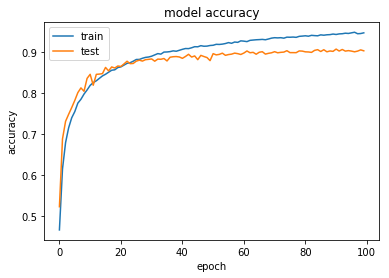

In [ ]:
plot(history)

In [ ]:
from keras.utils import to_categorical

# Assuming y_test is a list of integer labels
y_test_encoded = to_categorical(y_test)

# Now, evaluate the model
score = cnn_model.evaluate(X_test, y_test_encoded, batch_size=1)
print('Test accuracy: {}'.format(score[1]))

10000/10000 [==============================] - 4s 436us/step


[0.34665883693695071, 0.90259999999999996]